In [2]:
import librosa
from IPython.display import Audio

In [3]:
data_original_rs, sampling_rate_original = librosa.load(librosa.ex('nutcracker'))

C:\Users\luisn\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
f"The number of samples are {len(data_original_rs)}, the sample rate is {sampling_rate_original}"

'The number of samples are 2643264, the sample rate is 22050'

In [5]:
f"The seconds recorded are: {2643264/22050}" #si pongo el doble de sample rate, se escucha más rapi]do

'The seconds recorded are: 119.87591836734694'

In [6]:
#Audio(data_original_rs, sampling_rate_original*2)

In [7]:
import numpy as np
def sample_rate(frecuency, duration): 
    sample_rate = 22050
    data = librosa.tone(frecuency, sr=sample_rate, length=int(duration*sample_rate))
    nyquist_frequency = sample_rate/2
    return data,sample_rate, nyquist_frequency

In [8]:
#data is the amplitude values in an array
data, sample_rate, nyquist_frequency = sample_rate(200,10)

In [9]:
sample_rate

22050

In [10]:
nyquist_frequency

11025.0

In [11]:
data

array([ 6.12323400e-17,  5.69594981e-02,  1.13734048e-01, ...,
       -1.70139300e-01, -1.13734048e-01, -5.69594981e-02])

In [12]:
import matplotlib.pyplot as plt

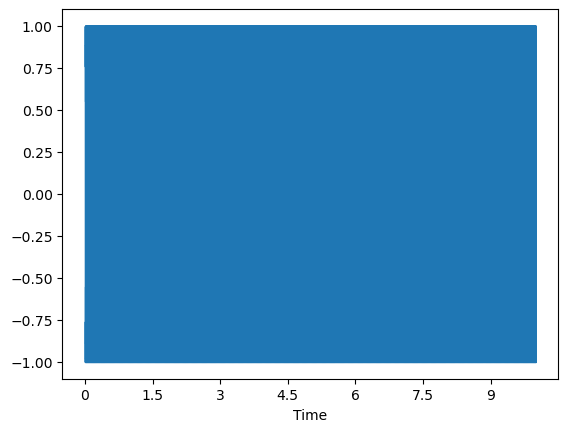

In [13]:
librosa.display.waveshow(data, sr=sample_rate)
plt.show()

In [14]:
Audio(data,rate=sample_rate)

In [15]:
data

array([ 6.12323400e-17,  5.69594981e-02,  1.13734048e-01, ...,
       -1.70139300e-01, -1.13734048e-01, -5.69594981e-02])

In [16]:
import numpy as np
def function_reduce(sr,new_sr,data):
    copy_data = []
    valDel = sr//new_sr
    for i in range(len(data)):
        if i%valDel == 0:
             copy_data.append(i)
    new_list = []
    for index, item in enumerate(data):
        if index not in copy_data:
            new_list.append(item)
    new_list = np.array(new_list)
    return new_list

In [17]:
list_reduce = function_reduce(22050,11025,data)

In [18]:
len(list_reduce)

110250

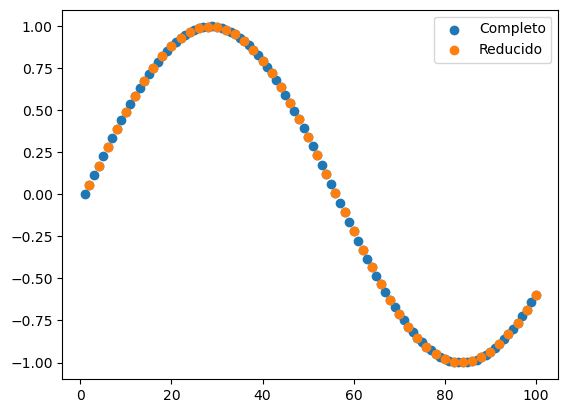

In [19]:
import matplotlib.pyplot as plt

x = [i for i in range(1, 101)]
x2 = [i for i in range(2, 101,2)]
plt.scatter(x, data[:100], label='Completo')
plt.scatter(x2, list_reduce[:50], label='Reducido')
plt.legend()
plt.show()

In [20]:
list_reduce

array([ 0.0569595 ,  0.1701393 ,  0.28111111, ..., -0.28111111,
       -0.1701393 , -0.0569595 ])

In [21]:
def function_increase(data):
    result = []
    for i in range(len(data)):
        result.append(data[i])
        if i < len(data)-1:
            result.append((data[i]+data[i+1])/2)
    return result

In [22]:
list_increase = function_increase(list_reduce)

In [23]:
len(list_increase)

220499

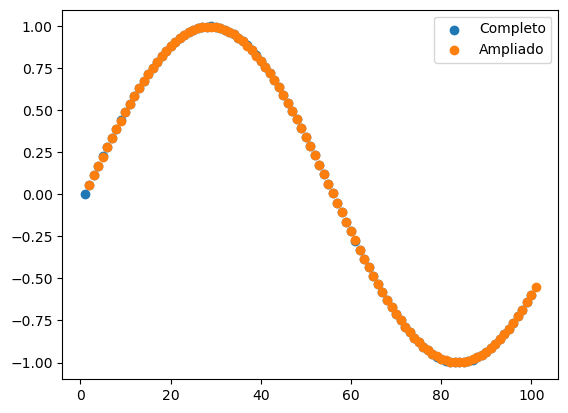

In [24]:
import matplotlib.pyplot as plt

x = [i for i in range(1, 101)]
x1 = [i for i in range(2,102)]
x2 = [i for i in range(2, 101,2)]
plt.scatter(x, data[:100], label='Completo')
plt.scatter(x1, list_increase[:100], label='Ampliado')
plt.legend()
plt.show()

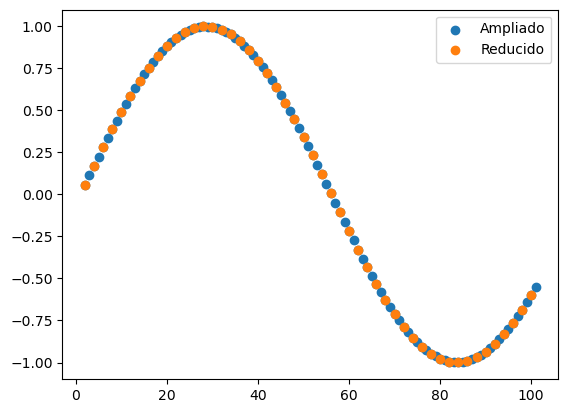

In [25]:
import matplotlib.pyplot as plt

x1 = [i for i in range(2,102)]
x2 = [i for i in range(2, 101,2)]
plt.scatter(x1, list_increase[:100], label='Ampliado')
plt.scatter(x2, list_reduce[:50], label='Reducido')
plt.legend()
plt.show()